<a href="https://colab.research.google.com/github/shan1306/Breast-Cancer-Detection-in-TensorFlow/blob/main/Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [19]:
breast_cancer_data = pd.read_csv('data.csv')
breast_cancer_data = breast_cancer_data.drop(breast_cancer_data.columns[-1],axis=1)
diagnosis = {'M': 1,'B': 0} # Converting string data into numerical data
breast_cancer_data.diagnosis = [diagnosis[item] for item in breast_cancer_data.diagnosis]
breast_cancer_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [20]:
# Scaling (Normalisizing) the data so the all the values in the dataset fall between 0 and 1

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

ct = make_column_transformer(
    (MinMaxScaler(), ["id", "radius_mean", "texture_mean", "perimeter_mean",  "area_mean", "radius_se", "perimeter_se", "area_se", "radius_worst", "texture_worst", "perimeter_worst", "area_worst"]) # turn all values in these columns between 0 and 1
)

X = breast_cancer_data.drop("diagnosis", axis=1)
y = breast_cancer_data["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [21]:
# Creating a test model with a learning_rate scheduler to find the optimum learning rate
# The learning_rate scheduler increments the learning_rate by a specific value every epoch

# Set random seed
tf.random.set_seed(42)

#1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(3, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

#2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))

#3. Fit the model
history_1 = model_1.fit(X_train_normal, y_train, epochs=100, callbacks=[lr_scheduler], verbose=0)

In [22]:
model_1.evaluate(X_test_normal, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.9777 - accuracy: 0.3772


[0.9776686429977417, 0.37719297409057617]

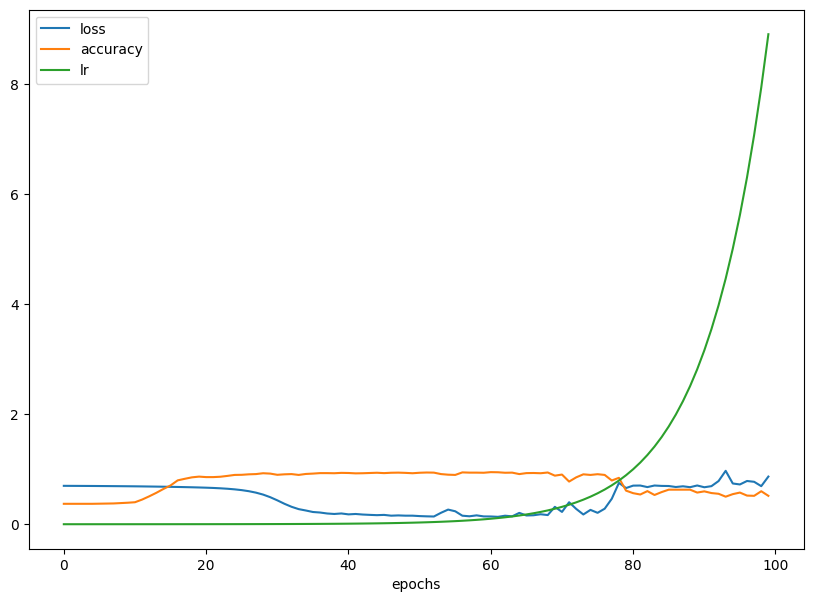

In [23]:
pd.DataFrame(history_1.history).plot(figsize=(10, 7), xlabel="epochs");

Text(0.5, 1.0, 'Learning Rate vs Loss')

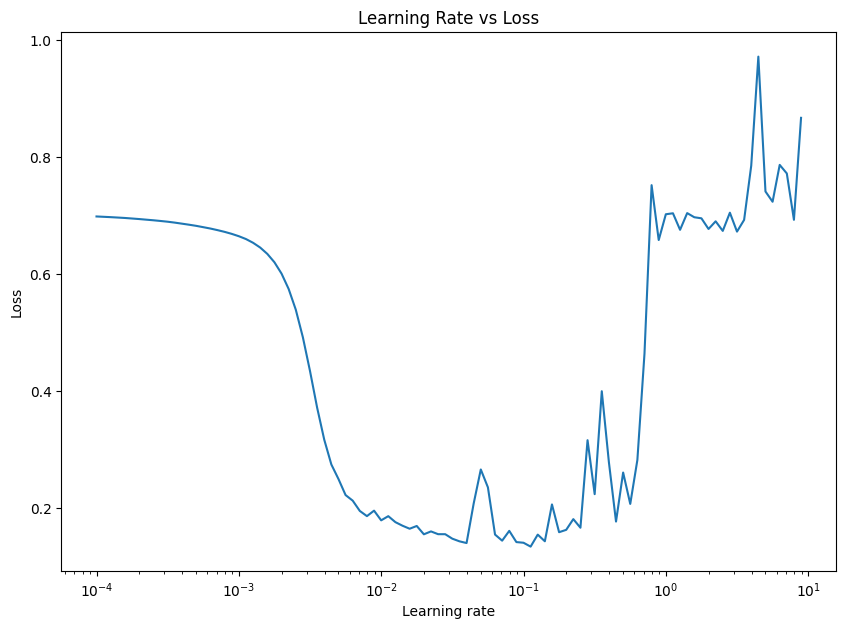

In [24]:
lrs = 1e-4 * (10**(tf.range(100)/20))  # replacing epoch by 100
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_1.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

In [25]:
10**-2 # This will be used as the optimal learning rate

0.01

In [26]:
tf.random.set_seed(42)


#1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

#3. Fit the model
history_2 = model_2.fit(X_train_normal, y_train, epochs=40, verbose=0)

In [27]:
model_2.evaluate(X_test_normal, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.1330 - accuracy: 0.9649


[0.13295212388038635, 0.9649122953414917]

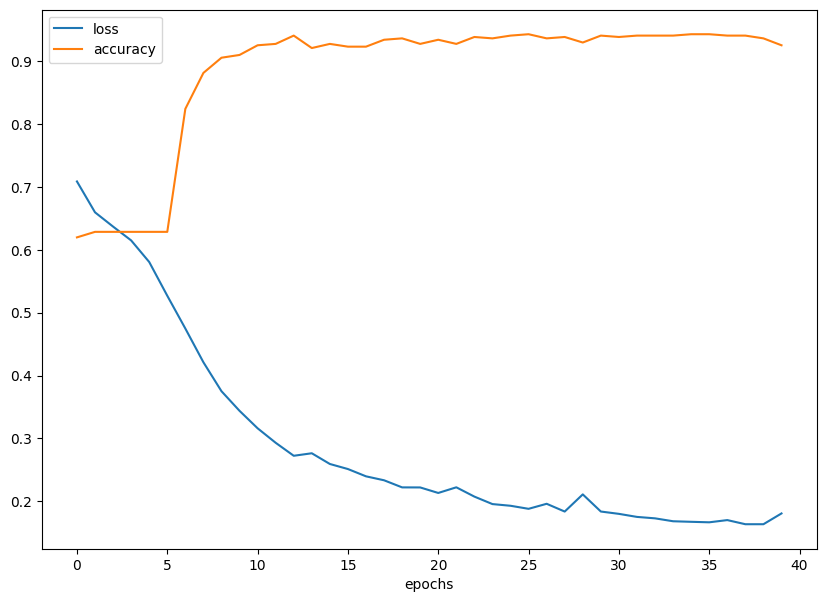

In [28]:
pd.DataFrame(history_2.history).plot(figsize=(10, 7), xlabel="epochs");

In [29]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_2.predict(X_test_normal)

# Create confusion matrix
temp_cm = confusion_matrix(y_test, tf.round(y_preds))

4/4 [==============================] - 0s 3ms/step


True Positives 70
False Positives 1
False Negatives 3
True Negatives 40


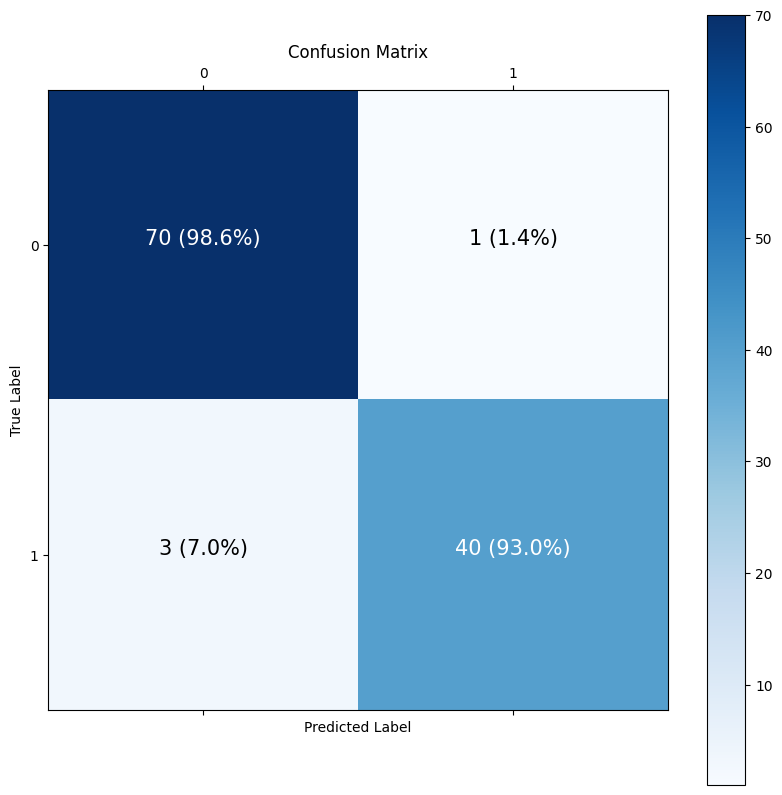

In [30]:
# Note: The confusion matrix code we're about to write is a remix of scikit-learn's plot_confusion_matrix
import itertools
import numpy as np

figsize=(10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalise our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set the x-axis labels to bottom
ax.xaxis.set_label_position("bottom")

# Set the threshold for different colors
threshold = (cm.max() + cm.min())/2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)


print("True Positives", cm[0,0])
print("False Positives", cm[0,1])
print("False Negatives", cm[1,0])
print("True Negatives", cm[1,1])